### 專案名稱: 第四屆機器學習百日馬拉松
### 功能描述: 第15天作業
### 版權所有: Dunk  
### 程式撰寫: Dunk  
### 撰寫日期：2020/03/12
### 改版日期:  
### 改版備註:

# [作業目標]
- 請同學試著使用 pandas.corr() 這個函數來顯示相關係數並加以觀察結果 
- 思考1 : 使用 pandas 有沒有什麼寫法, 可以顯示欄位中最大的幾筆, 以及最小幾筆呢? (Hint: 排序後列出前幾筆/後幾筆)
- 思考2 : 試著使用散佈圖, 顯示相關度最大/最小的特徵與目標值的關係, 如果圖形不明顯, 是否有調整的方法?

# [作業重點]
- 綜合前幾單元的作法, 試試看是否能夠用繪圖顯示出特徵與目標的相關性

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './data/'

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

### 相關係數
一樣，pandas 很貼心地讓我們可以非常容易計算相關係數

In [6]:
# 觀察相關係數
app_train.corr()['TARGET']

SK_ID_CURR                   -0.002108
TARGET                        1.000000
NAME_CONTRACT_TYPE           -0.030896
FLAG_OWN_CAR                 -0.021851
FLAG_OWN_REALTY              -0.006148
                                ...   
AMT_REQ_CREDIT_BUREAU_WEEK    0.000788
AMT_REQ_CREDIT_BUREAU_MON    -0.012462
AMT_REQ_CREDIT_BUREAU_QRT    -0.002022
AMT_REQ_CREDIT_BUREAU_YEAR    0.019930
DAYS_EMPLOYED_ANOM                 NaN
Name: TARGET, Length: 110, dtype: float64

## 練習時間
列出目標 (TARGET) 與所有欄位之間相關係數，數值最大以及最小各 15 個

通過相關係數的結果觀察有興趣的欄位與 TARGET 或其他欄位的相關係數，並嘗試找出有趣的訊息
- 最好的方式當然是畫圖，舉例來說，我們知道  EXT_SOURCE_3 這個欄位和 TARGET 之間的相關係數是 -0.178919 (在已經這個資料集已經是最負的了！)，那我們可以 EXT_SOURCE_3  為 x 軸， TARGET 為 y 軸，把資料給畫出來

### ANS:

In [46]:
# 求相關係數
import pprint

correlations = app_train.corr()['TARGET'].sort_values().dropna()
# 最大15個
max_corre = correlations.tail(15)
# 最小15個
min_corre = correlations.head(15)
pprint.pprint(max_corre)
pprint.pprint('---------------------')
pprint.pprint(min_corre)

DEF_60_CNT_SOCIAL_CIRCLE       0.031276
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
LIVE_CITY_NOT_WORK_CITY        0.032518
OWN_CAR_AGE                    0.037612
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_EMPLOYED                  0.074958
TARGET                         1.000000
Name: TARGET, dtype: float64
'---------------------'
EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_BIRTH                   -0.078239
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037

'max_corre'
'column[DEF_60_CNT_SOCIAL_CIRCLE]s 散狀圖'


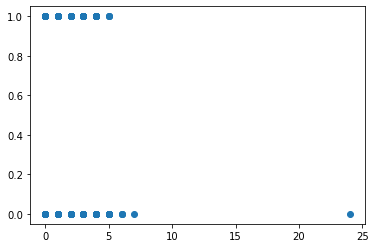

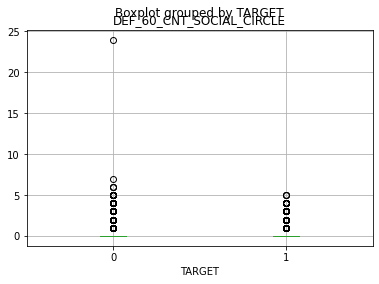

'column[DEF_30_CNT_SOCIAL_CIRCLE]s 散狀圖'


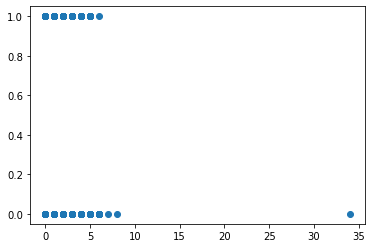

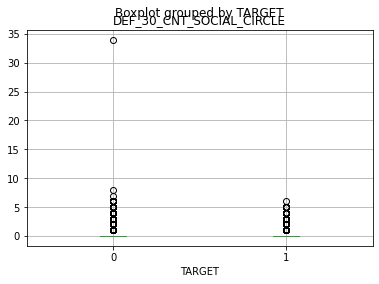

'column[LIVE_CITY_NOT_WORK_CITY]s 散狀圖'


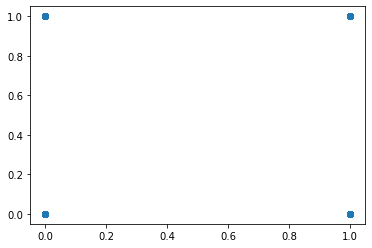

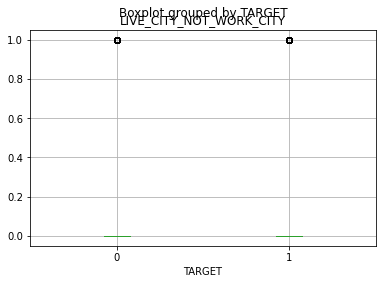

'column[OWN_CAR_AGE]s 散狀圖'


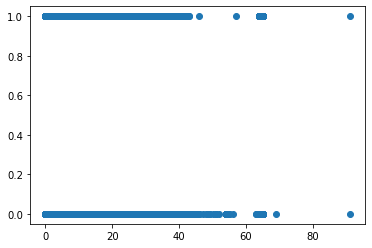

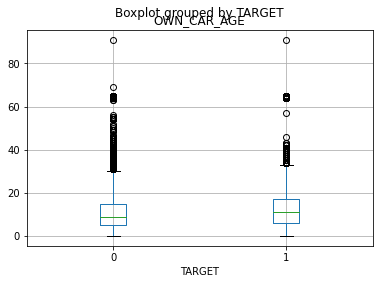

'column[DAYS_REGISTRATION]s 散狀圖'


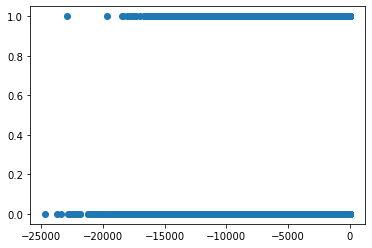

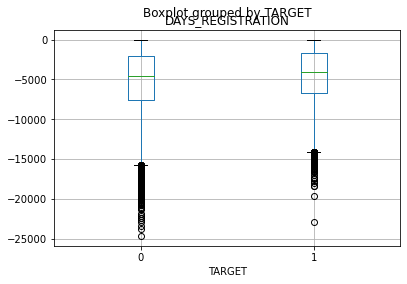

'column[FLAG_DOCUMENT_3]s 散狀圖'


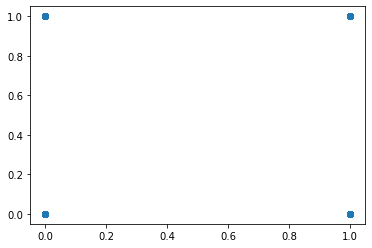

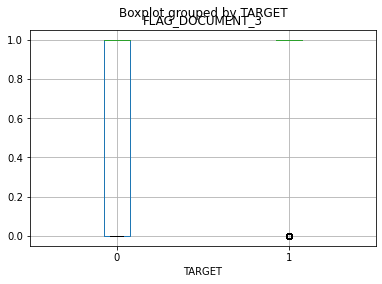

'column[REG_CITY_NOT_LIVE_CITY]s 散狀圖'


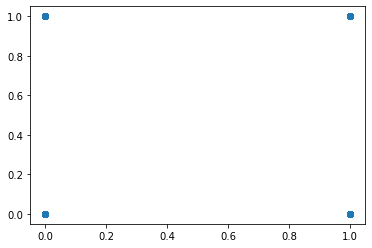

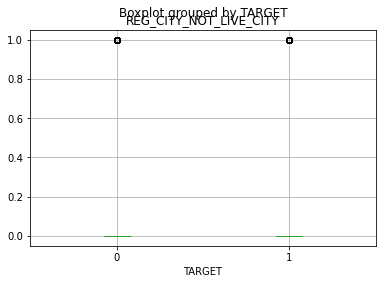

'column[FLAG_EMP_PHONE]s 散狀圖'


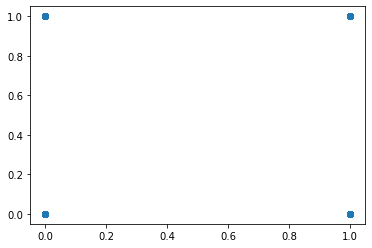

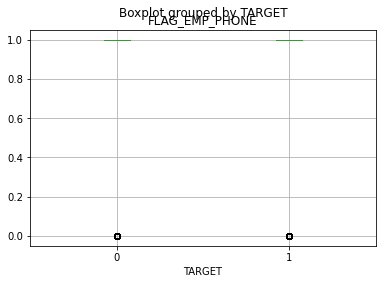

'column[REG_CITY_NOT_WORK_CITY]s 散狀圖'


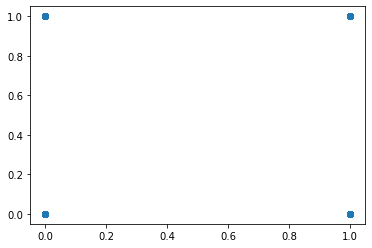

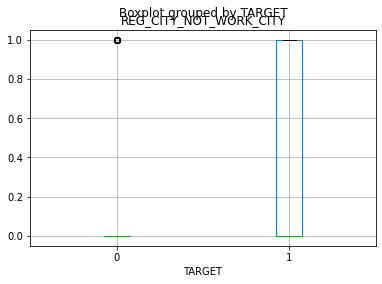

'column[DAYS_ID_PUBLISH]s 散狀圖'


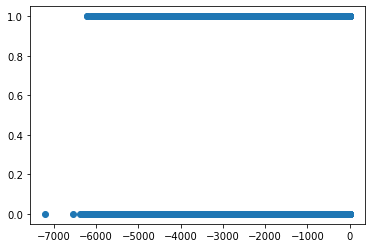

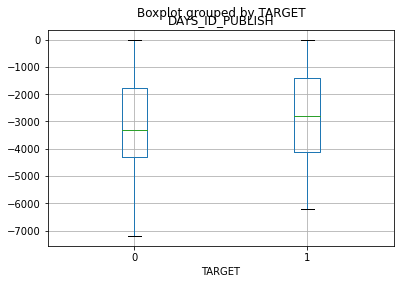

'column[DAYS_LAST_PHONE_CHANGE]s 散狀圖'


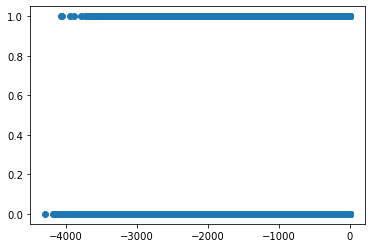

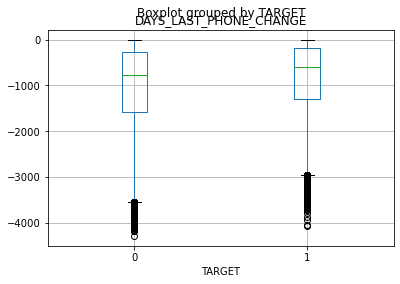

'column[REGION_RATING_CLIENT]s 散狀圖'


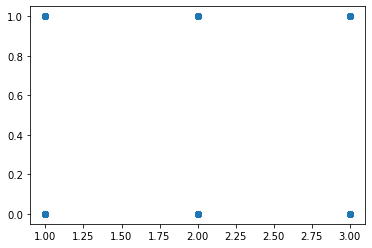

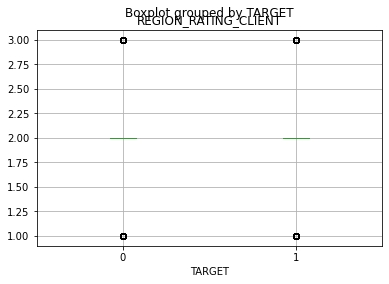

'column[REGION_RATING_CLIENT_W_CITY]s 散狀圖'


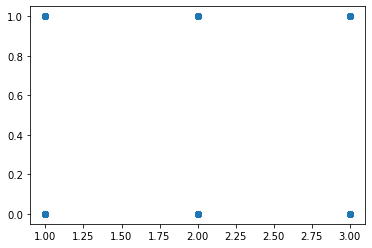

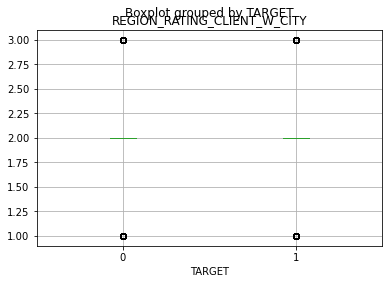

'column[DAYS_EMPLOYED]s 散狀圖'


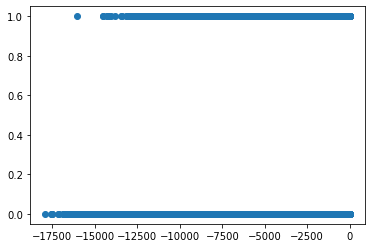

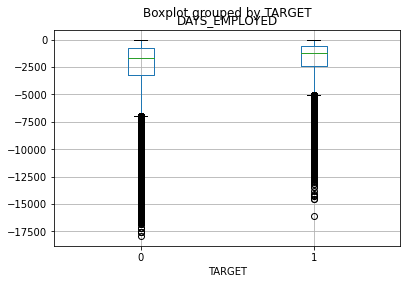

'column[TARGET]s 散狀圖'


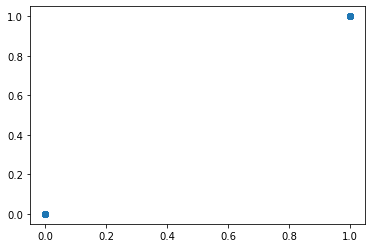

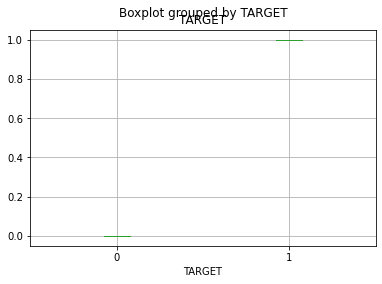

In [47]:
# 最大相關係數圖表
pprint.pprint('max_corre')
col_name = 'TARGET'
for col in max_corre.index:
    """
    建立圖表
    """
    pprint.pprint('column[{0}]''s {1}'.format(col,'散狀圖'))
    # 散狀圖
    plt.scatter(app_train[col], app_train[col_name])    
    # 箱型圖
    app_train.boxplot(by=col_name, column=col)
    plt.show()

'min_corre'
'column[EXT_SOURCE_3]s 散狀圖'


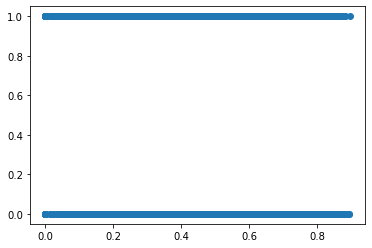

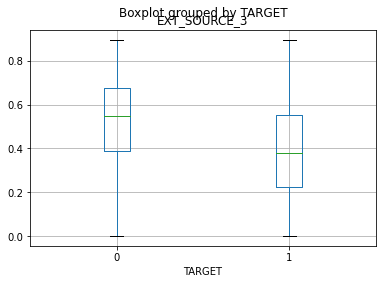

'column[EXT_SOURCE_2]s 散狀圖'


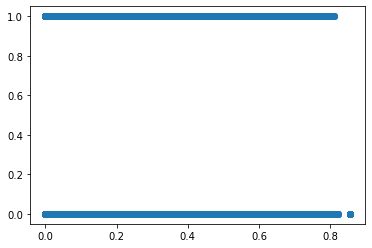

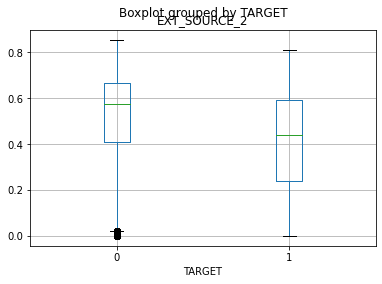

'column[EXT_SOURCE_1]s 散狀圖'


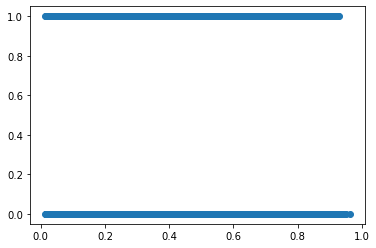

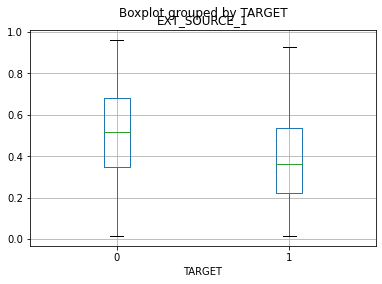

'column[DAYS_BIRTH]s 散狀圖'


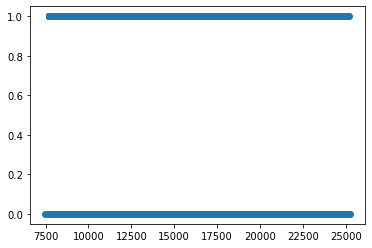

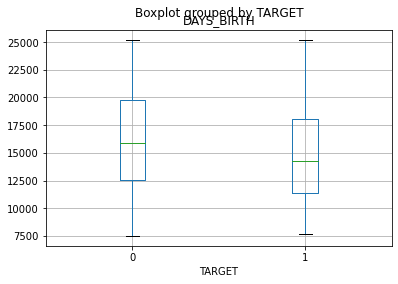

'column[FLOORSMAX_AVG]s 散狀圖'


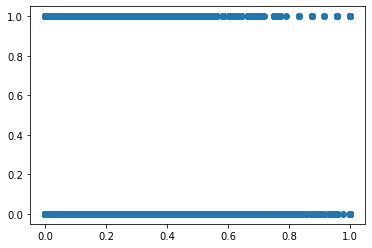

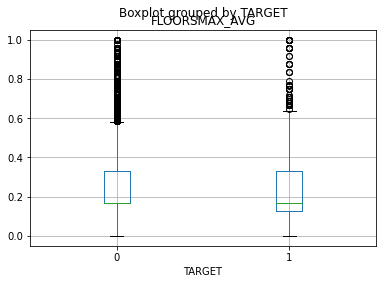

'column[FLOORSMAX_MEDI]s 散狀圖'


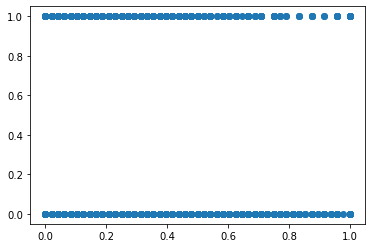

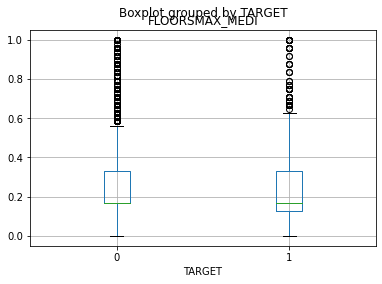

'column[FLOORSMAX_MODE]s 散狀圖'


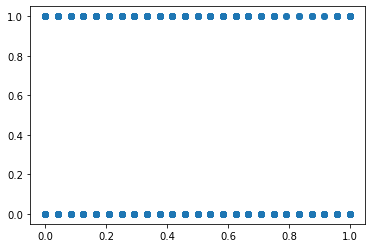

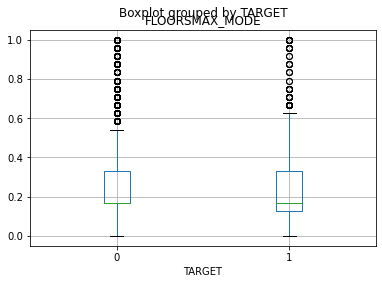

'column[AMT_GOODS_PRICE]s 散狀圖'


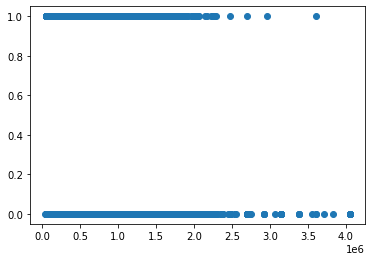

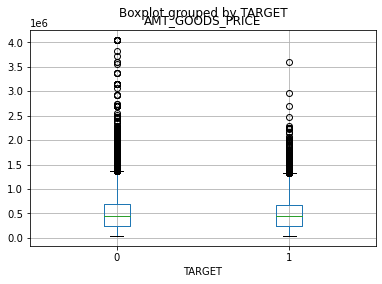

'column[REGION_POPULATION_RELATIVE]s 散狀圖'


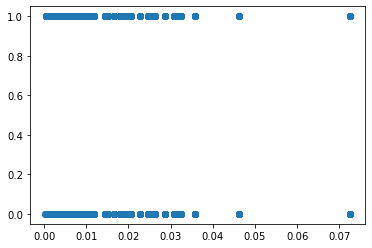

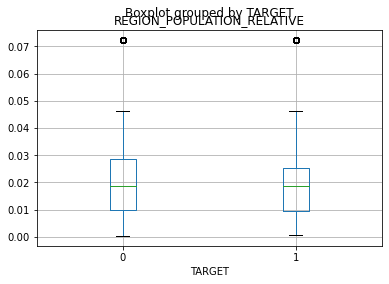

'column[ELEVATORS_AVG]s 散狀圖'


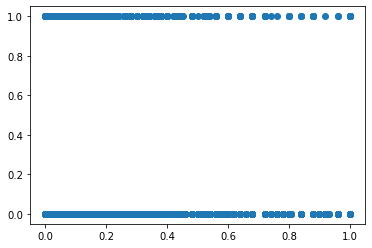

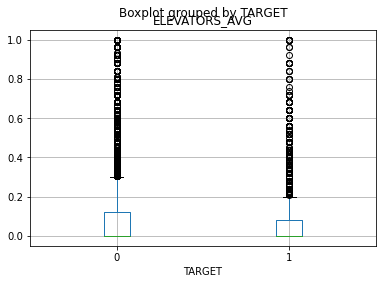

'column[ELEVATORS_MEDI]s 散狀圖'


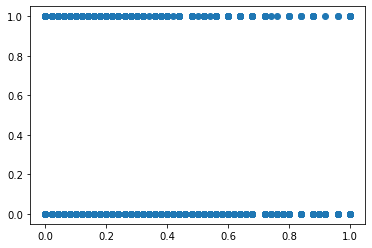

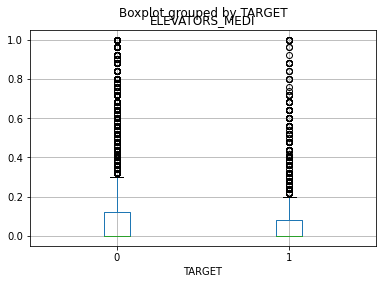

'column[FLOORSMIN_AVG]s 散狀圖'


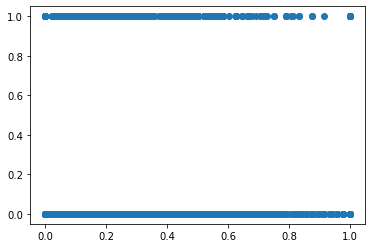

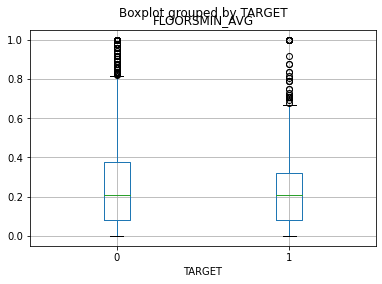

'column[FLOORSMIN_MEDI]s 散狀圖'


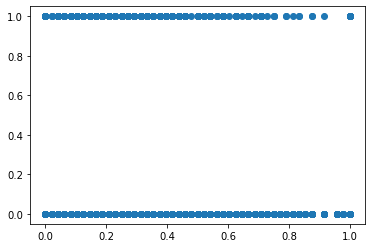

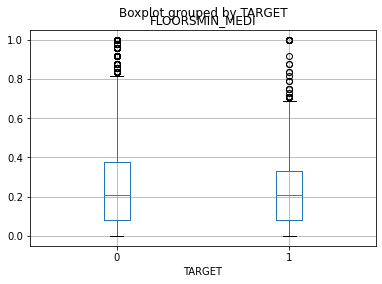

'column[LIVINGAREA_AVG]s 散狀圖'


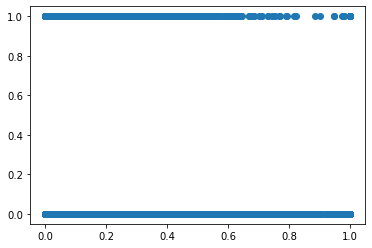

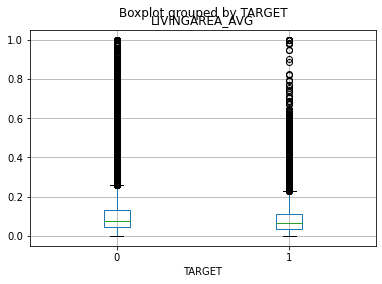

'column[LIVINGAREA_MEDI]s 散狀圖'


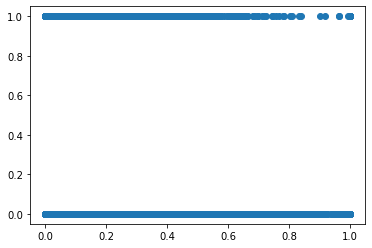

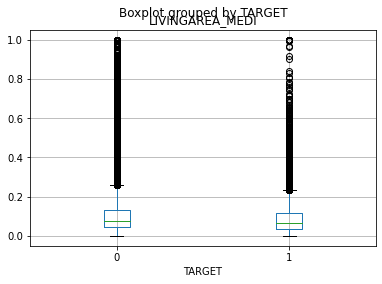

In [48]:
# 最小相關係數圖表
pprint.pprint('min_corre')
col_name = 'TARGET'
for col in min_corre.index:
    """
    建立圖表
    """
    pprint.pprint('column[{0}]''s {1}'.format(col,'散狀圖'))
    # 散狀圖
    plt.scatter(app_train[col], app_train[col_name])    
    # 箱型圖
    app_train.boxplot(by=col_name, column=col)
    plt.show()

In [55]:
# 重新讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train_source = pd.read_csv(f_app_train)
app_train_source.shape

(307511, 122)

In [59]:
# 檢查與最大相關的欄位
col_name = max_corre.index[len(max_corre)-2]
pprint.pprint(app_train_source[col_name])
pprint.pprint(app_train_source[col_name].unique)
#檢查統計值
pprint.pprint(app_train_source[col_name].describe())

0           -637
1          -1188
2           -225
3          -3039
4          -3038
           ...  
307506      -236
307507    365243
307508     -7921
307509     -4786
307510     -1262
Name: DAYS_EMPLOYED, Length: 307511, dtype: int64
<bound method Series.unique of 0           -637
1          -1188
2           -225
3          -3039
4          -3038
           ...  
307506      -236
307507    365243
307508     -7921
307509     -4786
307510     -1262
Name: DAYS_EMPLOYED, Length: 307511, dtype: int64>
count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64


#### 由統計值可以看到,DAYS_EMPLOYED天數最大值應該為異常

In [64]:
# 檢查與最小相關的欄位
col_name = min_corre.index[len(min_corre)-1]
pprint.pprint(app_train_source[col_name])
pprint.pprint(app_train_source[col_name].unique)
#檢查統計值
pprint.pprint(app_train_source[col_name].describe())
#檢查na
pprint.pprint("col {0} na total is:{1}".format(col_name,app_train_source[col_name].isna().sum()))

0         0.0193
1         0.0558
2            NaN
3            NaN
4            NaN
           ...  
307506    0.2001
307507    0.0261
307508    0.9445
307509    0.0062
307510    0.0805
Name: LIVINGAREA_MEDI, Length: 307511, dtype: float64
<bound method Series.unique of 0         0.0193
1         0.0558
2            NaN
3            NaN
4            NaN
           ...  
307506    0.2001
307507    0.0261
307508    0.9445
307509    0.0062
307510    0.0805
Name: LIVINGAREA_MEDI, Length: 307511, dtype: float64>
count    153161.000000
mean          0.108607
std           0.112260
min           0.000000
25%           0.045700
50%           0.074900
75%           0.130300
max           1.000000
Name: LIVINGAREA_MEDI, dtype: float64
'col LIVINGAREA_MEDI na total is:154350'


####  由上述看到LIVINGAREA_MEDI欄位有絕大多數是N/A,可作缺失值處理:
1. 保留N/A
2. 去除N/A
3. 取代值N/A